In [2]:
import shapely                 
from shapely.wkt import loads  

import pandas as pd           
import numpy as np
import geopandas as gpd 
import mapclassify as mp  
import matplotlib.pyplot as plt 

import seaborn as sb 
import statsmodels as sm
import statsmodels.formula.api as smf

In [3]:
mw_df = pd.read_csv("data/london-2011-2021-major-weapons.txt")

In [4]:
mw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LSOA11CD  4829 non-null   object 
 1   LSOA11NM  4829 non-null   object 
 2   MSOA11CD  4829 non-null   object 
 3   MSOA11NM  4829 non-null   object 
 4   LAD11CD   4829 non-null   object 
 5   LAD11NM   4829 non-null   object 
 6   2011      4829 non-null   float64
 7   2012      4829 non-null   float64
 8   2013      4829 non-null   float64
 9   2014      4829 non-null   float64
 10  2015      4829 non-null   float64
 11  2016      4829 non-null   float64
 12  2017      4829 non-null   float64
 13  2018      4829 non-null   float64
 14  2019      4829 non-null   float64
 15  2020      4829 non-null   float64
 16  2021      4829 non-null   float64
dtypes: float64(11), object(6)
memory usage: 641.5+ KB


In [5]:
my_df = pd.read_csv("data/LSOA_Data_2011.csv")

In [6]:
merge_df = pd.merge(my_df, mw_df, how='left', on='LSOA11CD')

In [7]:
merge_df.head()

LSOA11CD                 LSOA11NM_x MSOA11CD_x                MSOA11NM_x  \
0  E01000001        City of London 001A  E02000001        City of London 001   
1  E01000002        City of London 001B  E02000001        City of London 001   
2  E01000003        City of London 001C  E02000001        City of London 001   
3  E01000005        City of London 001E  E02000001        City of London 001   
4  E01000006  Barking and Dagenham 016A  E02000017  Barking and Dagenham 016   

   LAD11CD_x             LAD11NM_x    RGN11CD RGN11NM  \
0  E09000001        City of London  E12000007  London   
1  E09000001        City of London  E12000007  London   
2  E09000001        City of London  E12000007  London   
3  E09000001        City of London  E12000007  London   
4  E09000002  Barking and Dagenham  E12000007  London   

                                            geometry  USUALRES  ...  2012  \
0  POLYGON ((532105.0919998939 182011.23, 532162....      1465  ...   NaN   
1  POLYGON ((532746.8130000263 181786.891000028, ...      1436  ...   NaN   
2  POLYGON ((532135.1449999654 182198.1190000199,...      1346  ...   NaN   
3  POLYGON ((533807.9460001207 180767.7700000888,...       985  ...   NaN   
4  POLYGON ((545122.048999952 184314.931000118, 5...      1703  ...   0.0   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   0.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   1.0  

[5 rows x 48 columns]

In [8]:
print(merge_df.columns)

Index(['LSOA11CD', 'LSOA11NM_x', 'MSOA11CD_x', 'MSOA11NM_x', 'LAD11CD_x',
       'LAD11NM_x', 'RGN11CD', 'RGN11NM', 'geometry', 'USUALRES', 'HHOLDRES',
       'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ', 'RoadsArea', 'White',
       'MultiEthnic', 'Asian', 'Black', 'OtherEthnic', 'Area', 'HHI_mean',
       'HHI_median', 'gas_meters', 'gas_total', 'gas_mean', 'gas_median',
       'elec_meters', 'elec_total', 'elec_mean', 'elec_median', 'LSOA11NM_y',
       'MSOA11CD_y', 'MSOA11NM_y', 'LAD11CD_y', 'LAD11NM_y', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


In [9]:
merge_df.to_csv("Ethnicity12_Weapons.csv", index=False)

In [10]:
df = pd.read_csv("data/Ethnicity12_Weapons.csv")

gdf = gpd.GeoDataFrame(df)  #geopandas
gdf['geometry'] = gdf['geometry'].apply(lambda x: loads(x))  #from shapely
gdf = gdf.set_geometry('geometry')

In [11]:
df['log2011crime'] = np.log(df['2011']+0.1) 
print(df.sort_values(by='log2011crime', ascending=True).head(10).round(3)['log2011crime'])

4      -2.303
2686   -2.303
2688   -2.303
2690   -2.303
2692   -2.303
2693   -2.303
2695   -2.303
2697   -2.303
2699   -2.303
2702   -2.303
Name: log2011crime, dtype: float64


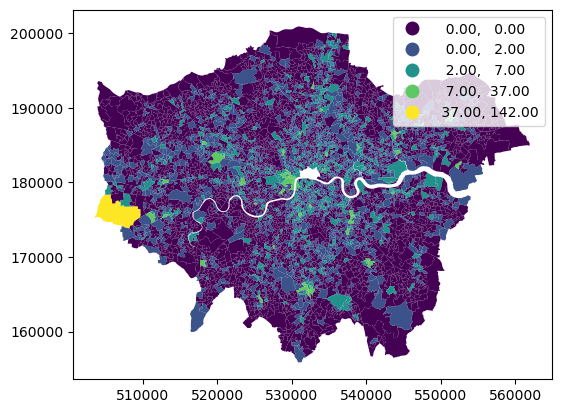

In [16]:
gdf.plot(column = '2011',
         legend = True,
        scheme = 'fisher_jenks')

plt.show()

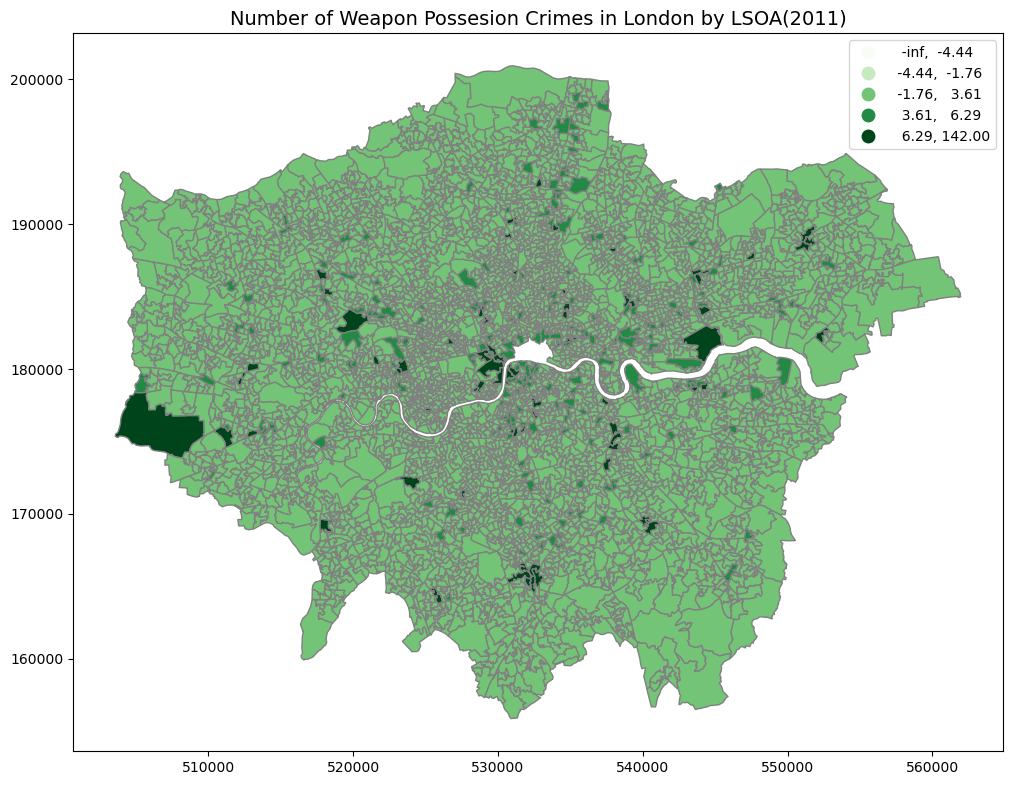

In [47]:
fig, ax1 = plt.subplots(1, figsize=(12, 10))    
gdf.plot(column='2011',
         ax=ax1,                               
         scheme='stdmean',  
         cmap='Greens',
         edgecolor = 'grey',
         legend=True) 
plt.title('Number of Weapon Possesion Crimes in London by LSOA(2011)', size=14)
plt.show()

In [13]:
#figure out how to remove values of 0 from the df

In [30]:
gdf['WhiteProp'] = gdf['White'] / gdf['USUALRES']

In [31]:
WhitePropLon = gdf['White'].sum() / gdf['USUALRES'].sum()

In [32]:
gdf['WhiteLQ'] = gdf['WhiteProp'] / WhitePropLon
gdf['WhiteLQ'].describe()

count    4835.000000
mean        1.015369
std         0.340390
min         0.059269
25%         0.768297
50%         1.055096
75%         1.297415
max         1.641651
Name: WhiteLQ, dtype: float64

<AxesSubplot: >

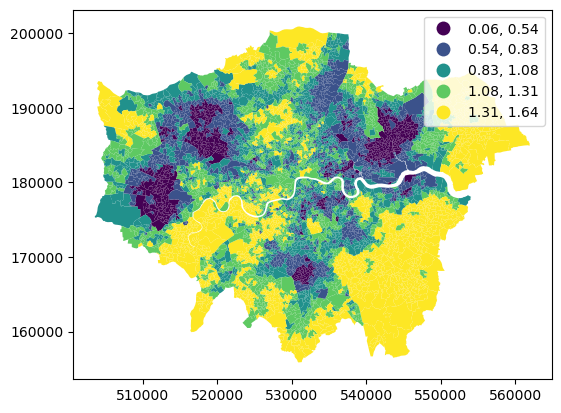

In [19]:
gdf.plot(column = 'WhiteLQ',
         legend = True,
         scheme = 'fisher_jenks')

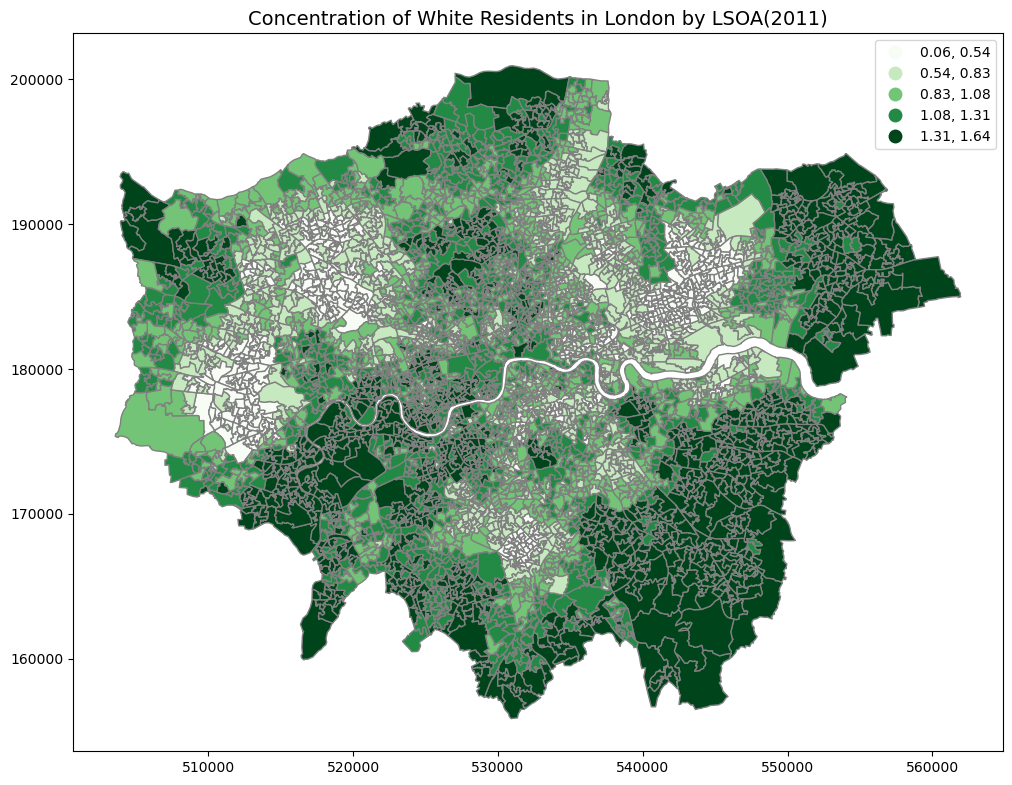

In [33]:
fig, ax1 = plt.subplots(1, figsize=(12, 10))    
gdf.plot(column='WhiteLQ',
         ax=ax1,                               
         scheme='fisher_jenks',  
         cmap='Greens',
         edgecolor = 'grey',
         legend=True) 
plt.title('Concentration of White Residents in London by LSOA(2011)', size=14)
plt.show()

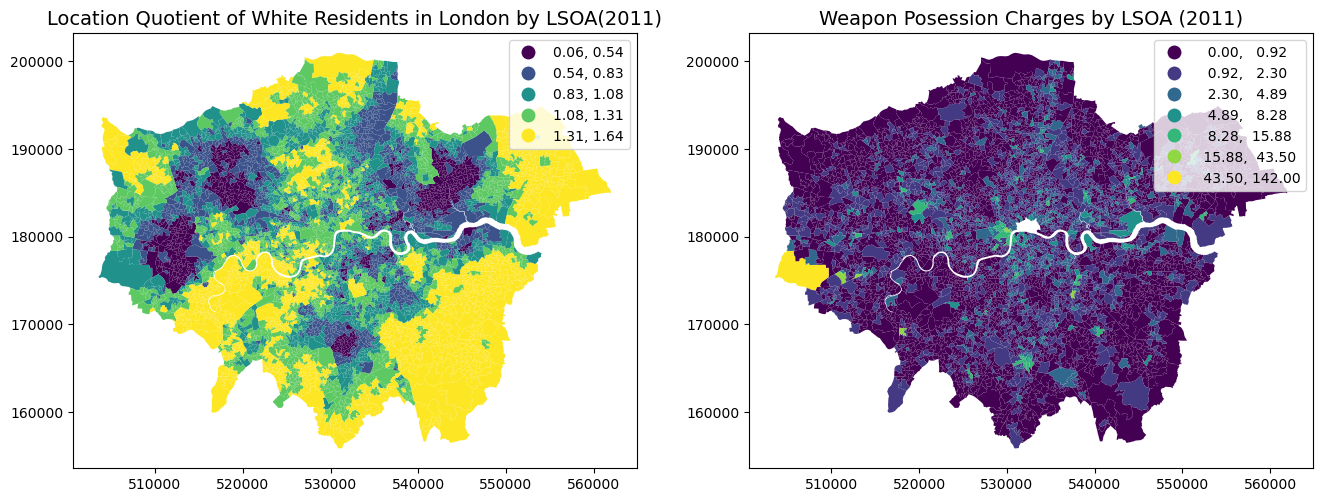

In [20]:
fig, axes = plt.subplots(1,2, figsize = (16,6))

gdf.plot(column = 'WhiteLQ', legend = True, cmap = "viridis", 
         scheme = 'fisher_jenks',
         ax = axes[0])
axes[0].set_title('Location Quotient of White Residents in London by LSOA(2011)', size=14)


gdf.plot(column = '2011', legend = True, cmap = "viridis", 
         scheme = 'headtailbreaks',
         ax = axes[1])
axes[1].set_title('Weapon Posession Charges by LSOA (2011)', size=14)
 

plt.show()

In [21]:
df['log2011crime'] = np.log(df['2011']+0.1) 
print(df.sort_values(by='log2011crime', ascending=True).head(10).round(3)['log2011crime'])

4      -2.303
2686   -2.303
2688   -2.303
2690   -2.303
2692   -2.303
2693   -2.303
2695   -2.303
2697   -2.303
2699   -2.303
2702   -2.303
Name: log2011crime, dtype: float64


In [35]:
gdf['AsianProp'] = gdf['Asian'] / gdf['USUALRES']

In [36]:
AsianPropLon = gdf['Asian'].sum() / gdf['USUALRES'].sum()

In [37]:
gdf['AsianLQ'] = gdf['AsianProp'] / AsianPropLon
gdf['AsianLQ'].describe()

count    4835.000000
mean        0.969649
std         0.873174
min         0.040659
25%         0.393438
50%         0.651014
75%         1.184914
max         4.699020
Name: AsianLQ, dtype: float64

<AxesSubplot: >

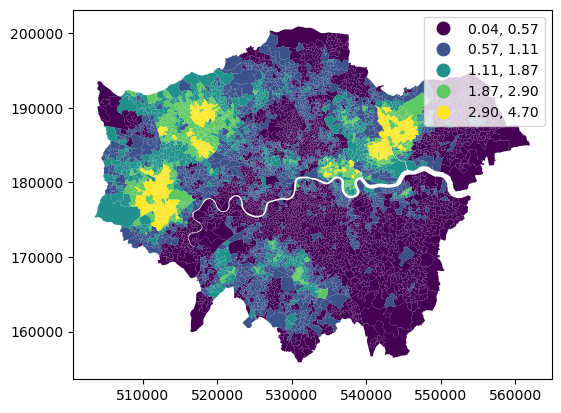

In [38]:
gdf.plot(column = 'AsianLQ',
         legend = True,
         scheme = 'fisher_jenks') 

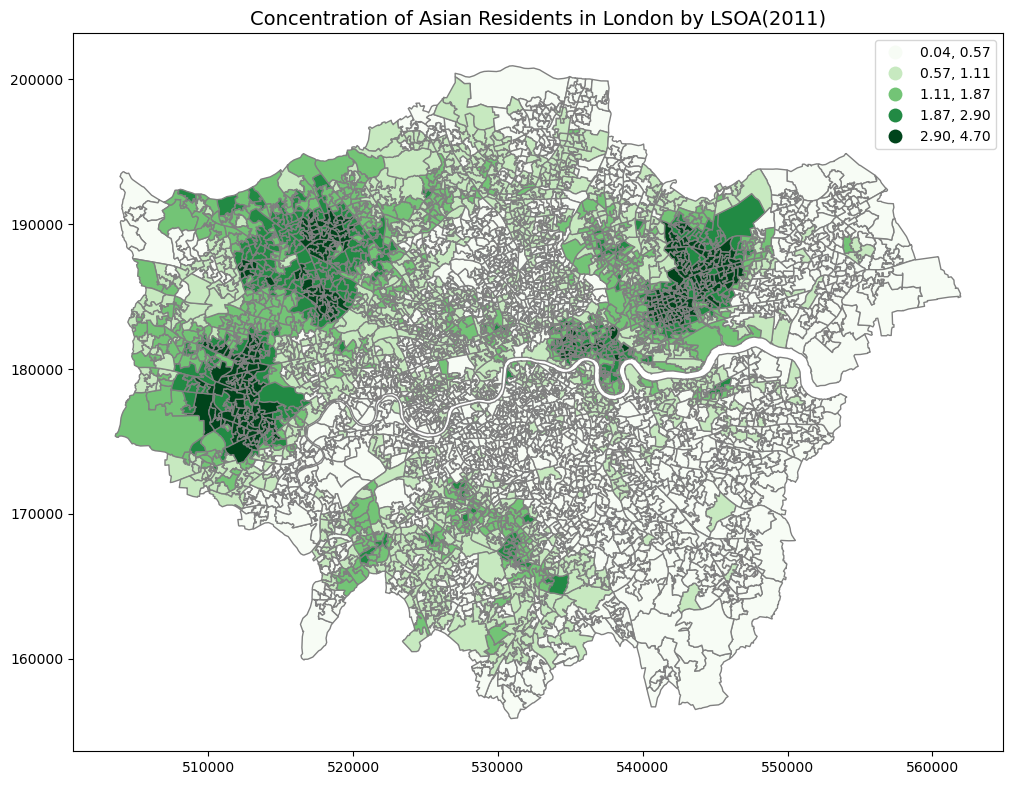

In [39]:
fig, ax1 = plt.subplots(1, figsize=(12, 10))  
gdf.plot(column='AsianLQ',
         ax=ax1,                               
         scheme='fisher_jenks',  
         cmap='Greens',
         edgecolor = 'grey',
         legend=True) 
plt.title('Concentration of Asian Residents in London by LSOA(2011)', size=14)
plt.show()

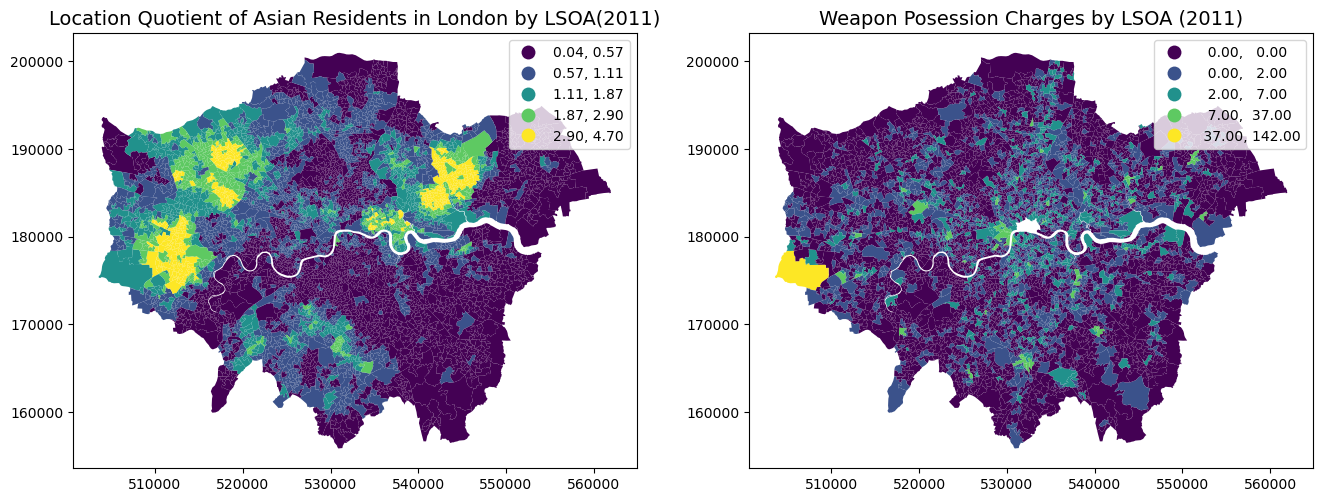

In [26]:
fig, axes = plt.subplots(1,2, figsize = (16,6))

gdf.plot(column = 'AsianLQ', legend = True, cmap = "viridis",
         scheme = 'fisher_jenks',
         ax = axes[0])
axes[0].set_title('Location Quotient of Asian Residents in London by LSOA(2011)', size=14)


gdf.plot(column = '2011', legend = True, cmap = "viridis",
         scheme = 'fisher_jenks',
         ax = axes[1])
axes[1].set_title('Weapon Posession Charges by LSOA (2011)', size=14)
 

plt.show()

In [40]:
gdf['BlackProp'] = gdf['Black'] / gdf['USUALRES']

In [41]:
BlackPropLon = gdf['Black'].sum() / gdf['USUALRES'].sum()

In [42]:
gdf['BlackLQ'] = gdf['BlackProp'] / BlackPropLon
gdf['BlackLQ'].describe()

count    4835.000000
mean        0.980061
std         0.839817
min         0.009783
25%         0.323574
50%         0.711178
75%         1.422122
max         4.779173
Name: BlackLQ, dtype: float64

<AxesSubplot: >

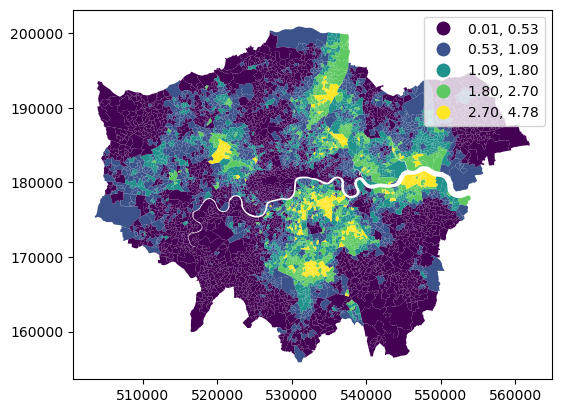

In [43]:
gdf.plot(column = 'BlackLQ',
         legend = True,
         scheme = 'fisher_jenks') 

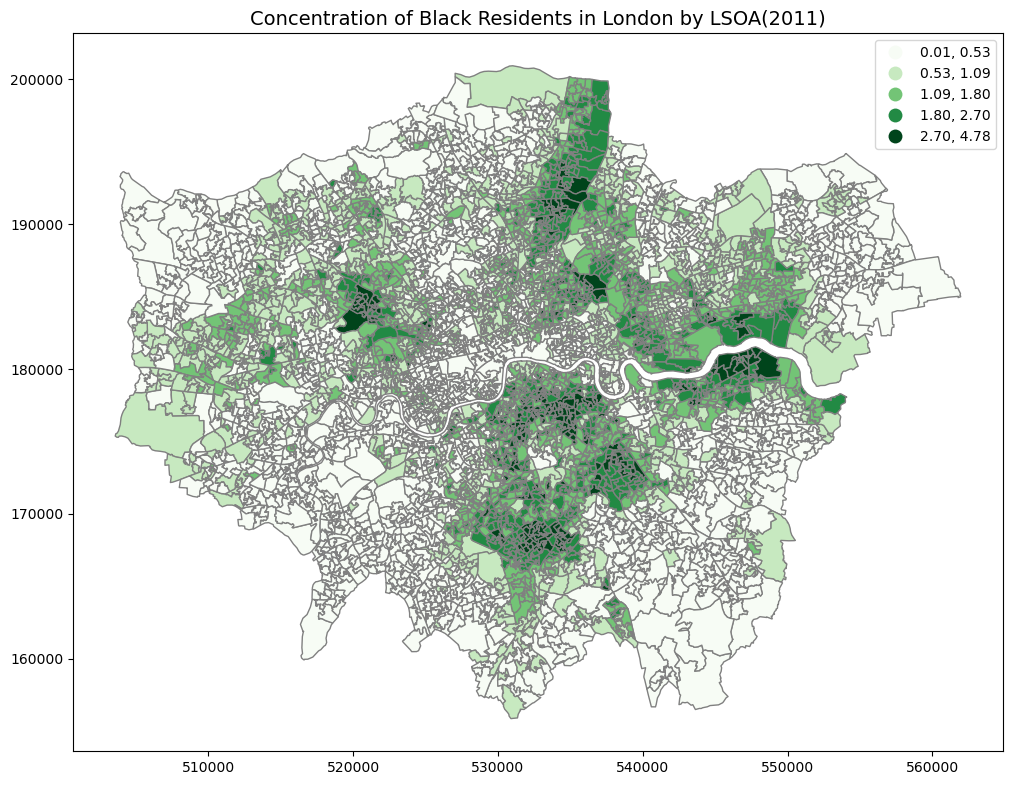

In [44]:
fig, ax1 = plt.subplots(1, figsize=(12, 10))    
gdf.plot(column='BlackLQ',
         ax=ax1,                               
         scheme='fisher_jenks',  
         cmap='Greens',
         edgecolor = 'grey',
         legend=True) 
plt.title('Concentration of Black Residents in London by LSOA(2011)', size=14)
plt.show()

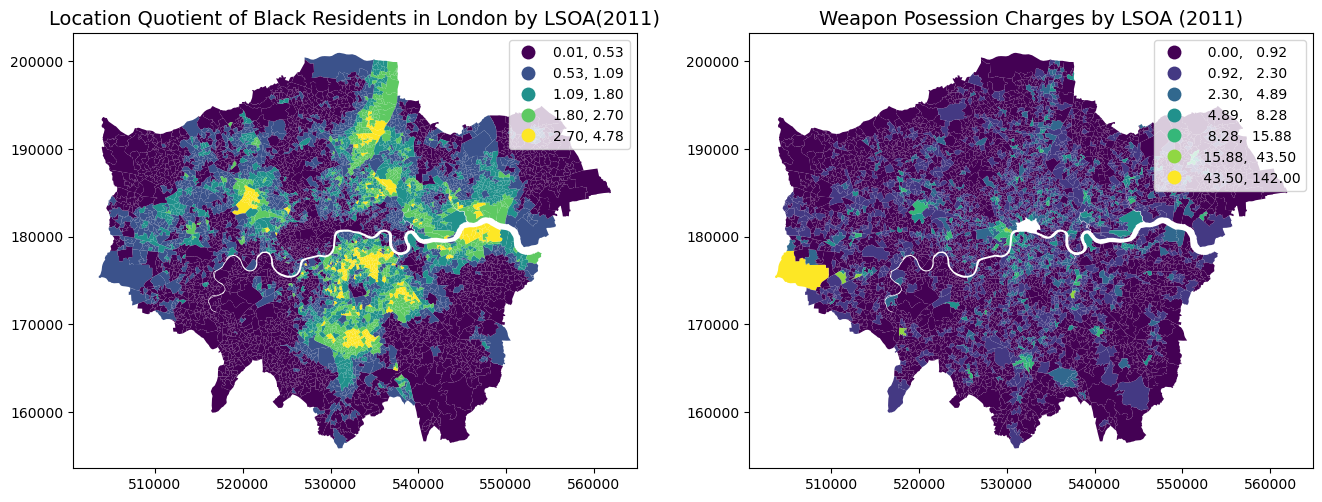

In [31]:
fig, axes = plt.subplots(1,2, figsize = (16,6))

gdf.plot(column = 'BlackLQ', legend = True, cmap = "viridis",
         scheme = 'fisher_jenks',
         ax = axes[0])
axes[0].set_title('Location Quotient of Black Residents in London by LSOA(2011)', size=14)


gdf.plot(column = '2011', legend = True, cmap = "viridis",
         scheme = 'headtailbreaks',
         ax = axes[1])
axes[1].set_title('Weapon Posession Charges by LSOA (2011)', size=14)
 

plt.show()

In [32]:
#figure out how to remove values of 0 from the df so that you can do regression model
#add a constant value (0.1) and then do the log!!! make the regression model from this

In [33]:
hrds = df[df['log2011crime'] > 0]

In [39]:
white_crime_mod = smf.ols('White ~ log2011crime', data = hrds) 
white_crime_mod_fit = white_crime_mod.fit()

In [40]:
print(white_crime_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  White   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.743
Date:                Mon, 16 Jan 2023   Prob (F-statistic):             0.0532
Time:                        13:49:44   Log-Likelihood:                -13960.
No. Observations:                1935   AIC:                         2.792e+04
Df Residuals:                    1933   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      954.5254     10.670     89.455   

In [41]:
asian_crime_mod = smf.ols('Asian ~ log2011crime', data = hrds) 
asian_crime_mod_fit = asian_crime_mod.fit()
print(asian_crime_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Asian   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.305
Date:                Mon, 16 Jan 2023   Prob (F-statistic):            0.00400
Time:                        13:50:52   Log-Likelihood:                -13909.
No. Observations:                1935   AIC:                         2.782e+04
Df Residuals:                    1933   BIC:                         2.783e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      326.9320     10.393     31.456   

In [42]:
black_crime_mod = smf.ols('Black ~ log2011crime', data = hrds) 
black_crime_mod_fit = black_crime_mod.fit()
print(black_crime_mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Black   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     35.18
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           3.55e-09
Time:                        13:52:33   Log-Likelihood:                -13157.
No. Observations:                1935   AIC:                         2.632e+04
Df Residuals:                    1933   BIC:                         2.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      275.8350      7.045     39.153   

In [ ]:
#figure out how to do grouped boxplot without 0s - just transform all the data!!!

In [ ]:
#aggregate the lsoa data to boroughs

In [ ]:
gbdf_sum = gdf.dissolve(by='LAD11NM_x', aggfunc='sum')
gbdf_sum.columns

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))
gbdf_sum.plot(column='2011', ax=ax, scheme='fisher_jenks', k=5, legend=True, cmap='viridis')

In [ ]:
boroMeans = boroughs.mean(numeric_only=True)
print(boroMeans[['2011']])
gdf['boroMeans'] = (boroMeans[['2011']])

In [ ]:
gdf[['boroMeans','LAD11NM_x']].boxplot(
    by='LAD11NM_x',
    grid=False,
    numeric_only=True)

plt.xticks(rotation=90)
plt.show()

In [ ]:
my_df[['Asian','LAD11NM']].barplot(
    by='LAD11NM',
    grid=False)

plt.xticks(rotation=90)
plt.show()

In [ ]:
#1. plot a histogram of `NOxmax` to check the distribution of the data and tranform if necessary
plt.hist(df['2011'], edgecolor='black', bins = 12)
df = df.assign(logNOxmax = np.log(df['2011']))

In [ ]:
plt.hist(df['log2011crime'], edgecolor='black', bins = 12)
plt.show()

In [ ]:
gdf['2011crime-lessmean']=gdf['2011'] - gdf['2011'].mean()
gdf['2011-z'] = gdf['2011crime-lessmean']/gdf['2011'].std()

In [ ]:
gdf['2011-z'].hist()

In [ ]:
RAgtr0 = df[df['2011'] > 0]
RAgtr0['log2011crime'].hist(grid=False)

In [ ]:
df[['log2011crime','LAD11NM_x']].barplot(by='LAD11NM_x')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sb.barplot(x='LAD11NM_x',
           y='2011',
           data=df)
plt.xticks(rotation=90)
plt.show()

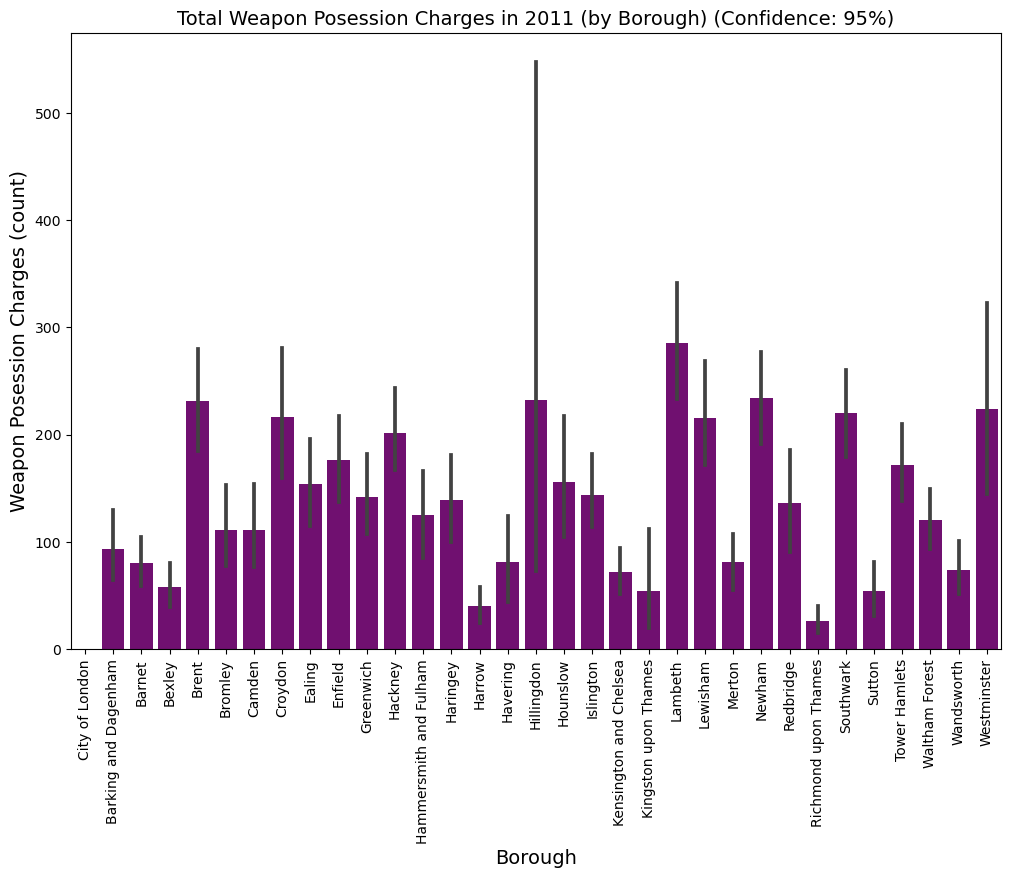

In [45]:
fig, ax = plt.subplots(1, figsize=(12, 8))
myci=95
sb.barplot(x='LAD11NM_x',
           y='2011',
           data=df, 
           estimator=np.sum, 
           color='purple',
           ci=myci)
plt.xticks(rotation=90)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Weapon Posession Charges (count)', fontsize=14)          
plt.title("Total Weapon Posession Charges in 2011 (by Borough) (Confidence: {0}%)".format(myci), fontsize=14)
 
plt.show()
